<a href="https://colab.research.google.com/github/mhazizian/COV19-ML/blob/main/AI_CA5_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI-CA5 Phase 2
**Mohammad Hosein Azizian**  
Student ID: 810195431

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls

drive  sample_data


In [3]:
!cp "/content/drive/MyDrive/xray.zip" .

In [ ]:
!unzip xray.zip

---
# Loading data

In [5]:
from tensorflow.keras import *
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dataGenerator = preprocessing.image.ImageDataGenerator(
# rescale = 1/255.0
)

In [7]:
dataTrain = dataGenerator.flow_from_directory(
    "/content/Data/train",
    target_size=(80,80),
    color_mode="grayscale",
    batch_size=32,
    shuffle=True
)

Found 5144 images belonging to 3 classes.


In [8]:
dataTest = dataGenerator.flow_from_directory(
    "/content/Data/test",
    target_size=(80,80),
    color_mode="grayscale",
    batch_size=32,
    shuffle=True
)

Found 1288 images belonging to 3 classes.


### Divide Test data into x_test and y_test for later usage.

In [9]:
x_test, y_test = [], []
for j in range(0, len(dataTest)):
  x,y = dataTest[j]
  x_test.extend(x)
  y_test.extend(y)

x_test = np.array(x_test)
y_test = np.array(y_test)

---
# Showing data samples from each category

[1. 0. 0.]


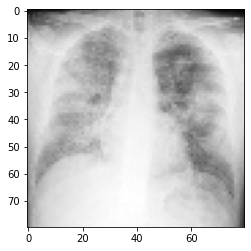

In [ ]:
x,y = dataTrain[1]
for i in range(0,1):
    image = x[i]
    plt.imshow(image.squeeze(), cmap='gray')
    print(y[i])

[0. 1. 0.]


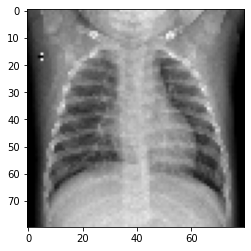

In [27]:
x,y = dataTrain[1]
for i in range(0,1):
    image = x[i]
    plt.imshow(image.squeeze(), cmap='gray')
    print(y[i])

[0. 0. 1.]


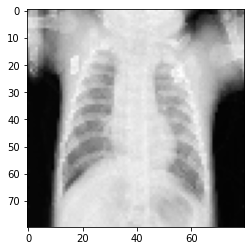

In [28]:
x,y = dataTrain[3]
for i in range(0,1):
    image = x[i]
    plt.imshow(image.squeeze(), cmap='gray')
    print(y[i])

---
# Data destibution
calculating lable count manually

In [ ]:
res = np.array([0,0,0])
for j in range(0, len(dataTest)):
  x,y = dataTest[j]
  for i in range(0,len(y)):
    res = res + np.array(list(y[i]))
print(res)

[116. 317. 855.]


Train:

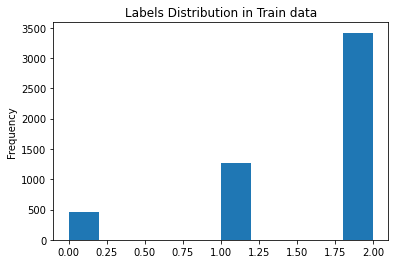

In [ ]:
plt.hist(dataTrain.labels)
plt.gca().set(title='Labels Distribution in Train data', ylabel='Frequency');

Test:

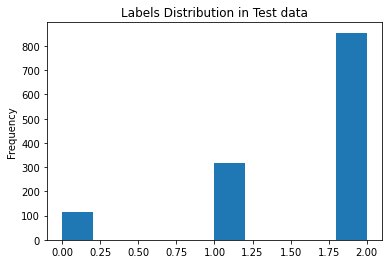

In [ ]:
plt.hist(dataTest.labels)
plt.gca().set(title='Labels Distribution in Test data', ylabel='Frequency');

---
# Part 3: Designing Model

In [ ]:
inp = layers.Input(shape=(80,80,1))
out = layers.Flatten()(inp)
out = layers.Dense(1024, activation="relu")(out)
out = layers.Dense(1024, activation="relu")(out)
out = layers.Dense(3, activation="softmax")(out)

In [ ]:
model = models.Model(inputs=inp, outputs=out)

In [ ]:
model.compile(
    optimizer=optimizers.SGD(learning_rate=0.01),
    loss=losses.categorical_crossentropy,
    metrics=['accuracy']
  )

## number of params in each layer:

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              6554624   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 3075      
Total params: 7,607,299
Trainable params: 7,607,299
Non-trainable params: 0
_________________________________________________________________


number of param in each layer is equal to:

size of layer * size of prev layer(```weight params```) + size of layer(```bias params```)

---
## Result Review Functions

In [10]:
def draw_plots(history):
  fig, axes = plt.subplots(1, 2, figsize=(15,7.5))
  axes[0].plot(history.history['accuracy'])
  axes[0].plot(history.history['val_accuracy'])
  axes[0].set_title('Model Accuracy')
  axes[0].set(xlabel='epoch', ylabel='accuracy')
  axes[0].legend(['train', 'test'], loc='upper left')

  axes[1].plot(history.history['loss'])
  axes[1].plot(history.history['val_loss'])
  axes[1].set_title('Model Loss')
  axes[1].set(xlabel='epoch', ylabel='loss')
  axes[1].legend(['train', 'test'], loc='upper left')

  fig.show()

In [11]:
from sklearn.metrics import classification_report

def print_metrics(ml_modle, x_test, y_test):
  pred = ml_modle.predict(x_test, batch_size=32, verbose=1)
  predicted = np.argmax(pred, axis=1)
  report = classification_report(np.argmax(y_test, axis=1), predicted)
  print(report)

---
# Part 4: Relu and Tanh activation function

## Relu Activation function

In [ ]:
history = model.fit(
    dataTrain,
    validation_data=dataTest,
    epochs=10
    )

Epoch 1/10
161/161 [==============================] - 142s 876ms/step - loss: nan - accuracy: 0.1581 - val_loss: nan - val_accuracy: 0.0901
Epoch 2/10
161/161 [==============================] - 141s 875ms/step - loss: nan - accuracy: 0.1330 - val_loss: nan - val_accuracy: 0.0901
Epoch 3/10
161/161 [==============================] - 141s 873ms/step - loss: nan - accuracy: 0.0848 - val_loss: nan - val_accuracy: 0.0901
Epoch 4/10
161/161 [==============================] - 141s 879ms/step - loss: nan - accuracy: 0.1049 - val_loss: nan - val_accuracy: 0.0901
Epoch 5/10
161/161 [==============================] - 141s 876ms/step - loss: nan - accuracy: 0.0591 - val_loss: nan - val_accuracy: 0.0901
Epoch 6/10
161/161 [==============================] - 140s 870ms/step - loss: nan - accuracy: 0.1023 - val_loss: nan - val_accuracy: 0.0901
Epoch 7/10
161/161 [==============================] - 141s 870ms/step - loss: nan - accuracy: 0.0716 - val_loss: nan - val_accuracy: 0.0901
Epoch 8/10
161/161 [

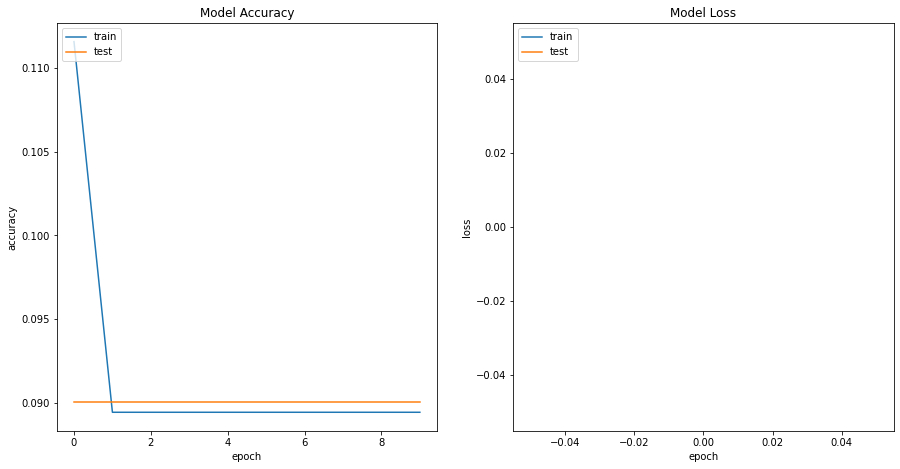

In [ ]:
draw_plots(history)

In [ ]:
print_metrics(model, x_test, y_test)

41/41 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.09      1.00      0.17       116
           1       0.00      0.00      0.00       317
           2       0.00      0.00      0.00       855

    accuracy                           0.09      1288
   macro avg       0.03      0.33      0.06      1288
weighted avg       0.01      0.09      0.01      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Tanh Activation function

In [ ]:
inp2 = layers.Input(shape=(80,80,1))
out2 = layers.Flatten()(inp2)
out2 = layers.Dense(1024, activation="tanh")(out2)
out2 = layers.Dense(1024, activation="tanh")(out2)
out2 = layers.Dense(3, activation="softmax")(out2)

In [ ]:
model_tanh = models.Model(inputs=inp2, outputs=out2)

model_tanh.compile(
    optimizer=optimizers.SGD(learning_rate=0.01),
    loss=losses.categorical_crossentropy,
    metrics=['accuracy']
  )

In [ ]:
history_tanh = model_tanh.fit(
    dataTrain,
    validation_data=dataTest,
    epochs=10
    )

Epoch 1/10
161/161 [==============================] - 143s 890ms/step - loss: 3.4938 - accuracy: 0.5239 - val_loss: 1.4135 - val_accuracy: 0.6638
Epoch 2/10
161/161 [==============================] - 142s 885ms/step - loss: 1.2479 - accuracy: 0.5926 - val_loss: 1.1658 - val_accuracy: 0.6638
Epoch 3/10
161/161 [==============================] - 143s 889ms/step - loss: 1.1734 - accuracy: 0.5466 - val_loss: 0.9484 - val_accuracy: 0.6638
Epoch 4/10
161/161 [==============================] - 142s 887ms/step - loss: 1.0207 - accuracy: 0.5765 - val_loss: 1.0131 - val_accuracy: 0.6638
Epoch 5/10
161/161 [==============================] - 142s 887ms/step - loss: 0.9901 - accuracy: 0.6111 - val_loss: 0.9322 - val_accuracy: 0.6638
Epoch 6/10
161/161 [==============================] - 143s 887ms/step - loss: 0.9417 - accuracy: 0.6543 - val_loss: 0.8653 - val_accuracy: 0.6638
Epoch 7/10
161/161 [==============================] - 142s 879ms/step - loss: 1.0458 - accuracy: 0.5156 - val_loss: 0.8622 -

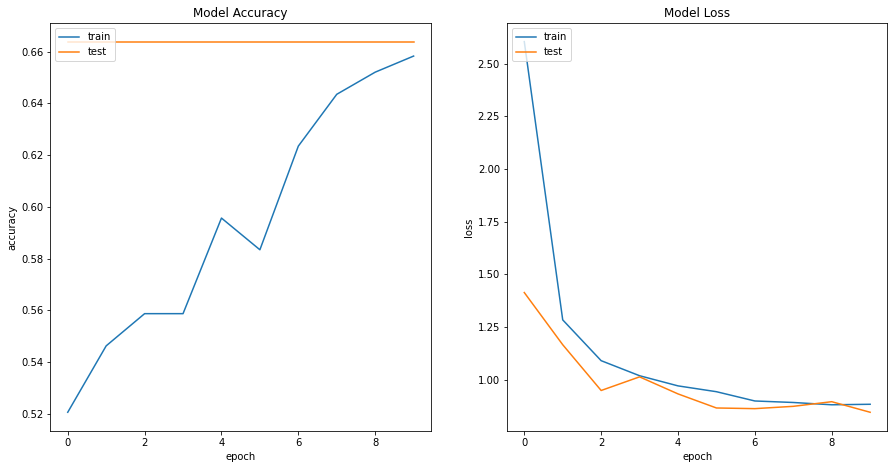

In [ ]:
draw_plots(history_tanh)

In [ ]:
print_metrics(model_tanh, x_test, y_test)

41/41 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       317
           2       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conclusion
<div dir="rtl">
در استفاده از تابع فعال ساز relu به دلیل نرمالایز نبودن شبکه، شاهد واگرا شدن و دیدن مقدار NAN هستیم که عملا کارکد شبکه را مختل کرده‌است.
</div><br>
<div dir="rtl">
تابع tanh به دلیل مپ کردن بازه اعداد حقیقی در بازه -۱ تا +۱، به نوعی در لایه‌های ابتدایی موجب محدود شدن بازه داده ها و از این طریق همگرایی شبکه می‌شود.
</div><div dir="rtl">
ولی این مسئله پایدار نبوده و مجددا به دللیل بازه برد این تابع، تمامی مقادیر زیاد به ۱ همگرا شده و باقی در بازه -۱ تا +۱ توزیع می‌شوند که میتواند در عملکرد شبکه اختلال ایجاد نکند. همان طور که انتظار می‌رفت، این مدل در ابتدا عملکرد بهتری نسبت به relu بدون نرمال کردن نشان می‌دهد ولی دقت آن از حدود ۶۰ درصد بیشتر‌ نمی‌شود.
</div>
<div dir="rtl"><b>
راهکار استفاده از تابع فعال ساز relu در کنار نرمال کردن داده‌ها است.
</b></div>


---
# Part 5: adding Normalization

In [11]:
inp3 = layers.Input(shape=(80,80,1))
out3 = layers.Flatten()(inp3)
out3 = layers.experimental.preprocessing.Rescaling(scale=1.0 / 255)(out3)
out3 = layers.Dense(1024, activation="relu")(out3)
out3 = layers.Dense(1024, activation="relu")(out3)
out3 = layers.Dense(3, activation="softmax")(out3)

In [12]:
model_norm = models.Model(inputs=inp3, outputs=out3)

model_norm.compile(
    optimizer=optimizers.SGD(learning_rate=0.01),
    loss=losses.categorical_crossentropy,
    metrics=['accuracy']
  )

In [ ]:
history_norm = model_norm.fit(
    dataTrain,
    validation_data=dataTest,
    epochs=10
    )

Epoch 1/10
161/161 [==============================] - 144s 898ms/step - loss: 0.7152 - accuracy: 0.6915 - val_loss: 0.3148 - val_accuracy: 0.8983
Epoch 2/10
161/161 [==============================] - 143s 890ms/step - loss: 0.3938 - accuracy: 0.8517 - val_loss: 0.2545 - val_accuracy: 0.9084
Epoch 3/10
161/161 [==============================] - 144s 893ms/step - loss: 0.3150 - accuracy: 0.8812 - val_loss: 0.2155 - val_accuracy: 0.9262
Epoch 4/10
161/161 [==============================] - 143s 891ms/step - loss: 0.3019 - accuracy: 0.8877 - val_loss: 0.3490 - val_accuracy: 0.8587
Epoch 5/10
161/161 [==============================] - 144s 892ms/step - loss: 0.3065 - accuracy: 0.8824 - val_loss: 0.1879 - val_accuracy: 0.9332
Epoch 6/10
161/161 [==============================] - 143s 890ms/step - loss: 0.2517 - accuracy: 0.9029 - val_loss: 0.1994 - val_accuracy: 0.9208
Epoch 7/10
161/161 [==============================] - 144s 894ms/step - loss: 0.2615 - accuracy: 0.9013 - val_loss: 0.2615 -

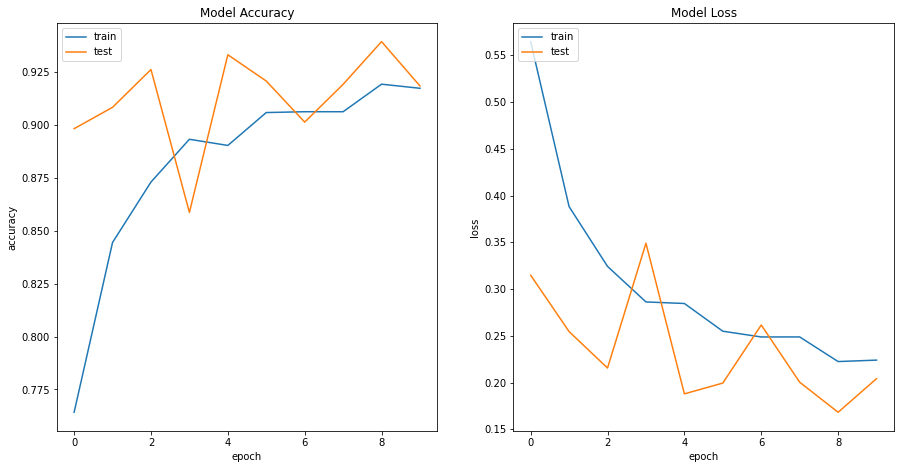

In [ ]:
draw_plots(history_norm)

In [ ]:
print_metrics(model_norm, x_test, y_test)

41/41 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       116
           1       0.79      0.96      0.87       317
           2       0.98      0.91      0.94       855

    accuracy                           0.92      1288
   macro avg       0.90      0.91      0.90      1288
weighted avg       0.93      0.92      0.92      1288



---
# Part 6: Optimizers

## Momentum
<div dir="rtl">
هدف اصلی استفاده از این روش دریادگیری ماشین، افزایش سرعت یادگیری است. در ابتدای یادگیری شبکه، مدل از حالت مطلوب فاصله زیادی دارد و استفاده از learning rate های بیشتری میتواند در این هنگام مفید باشد.
</div><div dir="rtl">
اما هرچه مدل به حالت مطلوب خود نزدیک می‌شود، لازم است تا learning rate کاهش یافته تا بتوانیم به همگرایی لازم برسی وگرنه مدل از حدی بیشتر نمی‌تواند دقت اش را افزایش دهد.
</div>

Pros:
- Can be used to handle noisy gradients
- Can handle extremely small gradients

Cons:
- Introduces further complexity in the model


<div dir="rtl">
ایده اصلی الگوریتم، استفاده از مفهومی مشابه انرژي پتانسیل است که میتواند به انرژی جنبشی تبدیل شود و برعکس
</div>

**Momentum update:**  
v = mu * v - learning_rate * dw  
w += v

### momentum = 0.05

In [68]:
backend.clear_session()

inp3 = layers.Input(shape=(80,80,1))
out3 = layers.Flatten()(inp3)
out3 = layers.experimental.preprocessing.Rescaling(scale=1.0 / 255)(out3)
out3 = layers.Dense(1024, activation="relu")(out3)
out3 = layers.Dense(1024, activation="relu")(out3)
out3 = layers.Dense(3, activation="softmax")(out3)

In [69]:
model_mome1 = models.Model(inputs=inp3, outputs=out3)

model_mome1.compile(
    optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.5),
    loss=losses.categorical_crossentropy,
    metrics=['accuracy']
  )

In [70]:
history_mome1 = model_mome1.fit(
    dataTrain,
    validation_data=dataTest,
    epochs=10
    )

Epoch 1/10
161/161 [==============================] - 143s 885ms/step - loss: 0.6471 - accuracy: 0.7628 - val_loss: 0.3114 - val_accuracy: 0.8672
Epoch 2/10
161/161 [==============================] - 144s 899ms/step - loss: 0.3356 - accuracy: 0.8728 - val_loss: 0.2358 - val_accuracy: 0.9208
Epoch 3/10
161/161 [==============================] - 142s 881ms/step - loss: 0.2922 - accuracy: 0.8900 - val_loss: 0.2188 - val_accuracy: 0.9146
Epoch 4/10
161/161 [==============================] - 141s 880ms/step - loss: 0.2527 - accuracy: 0.9096 - val_loss: 0.2068 - val_accuracy: 0.9262
Epoch 5/10
161/161 [==============================] - 141s 876ms/step - loss: 0.2704 - accuracy: 0.9009 - val_loss: 0.1891 - val_accuracy: 0.9255
Epoch 6/10
161/161 [==============================] - 141s 879ms/step - loss: 0.2317 - accuracy: 0.9132 - val_loss: 0.2419 - val_accuracy: 0.9053
Epoch 7/10
161/161 [==============================] - 141s 874ms/step - loss: 0.2485 - accuracy: 0.9047 - val_loss: 0.1943 -

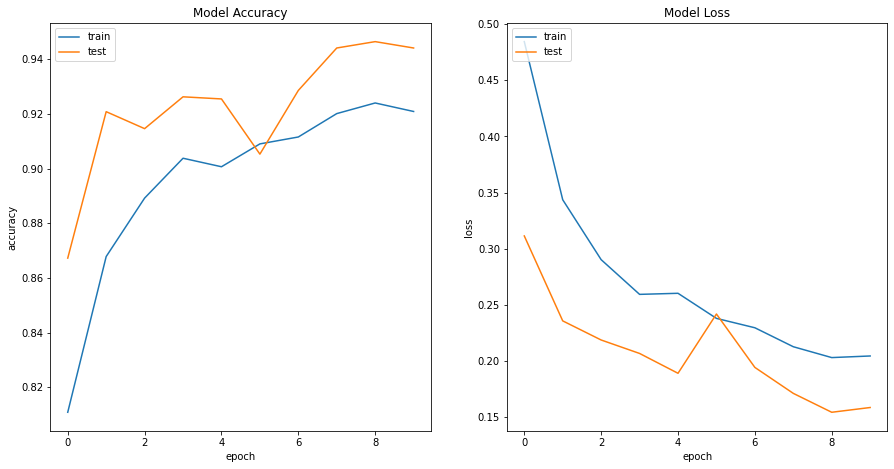

In [71]:
draw_plots(history_mome1)

In [72]:
print_metrics(model_mome1, x_test, y_test)

41/41 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       116
           1       0.93      0.88      0.91       317
           2       0.94      0.98      0.96       855

    accuracy                           0.94      1288
   macro avg       0.96      0.90      0.92      1288
weighted avg       0.94      0.94      0.94      1288



### momentum = 0.9

In [73]:
backend.clear_session()

inp3 = layers.Input(shape=(80,80,1))
out3 = layers.Flatten()(inp3)
out3 = layers.experimental.preprocessing.Rescaling(scale=1.0 / 255)(out3)
out3 = layers.Dense(1024, activation="relu")(out3)
out3 = layers.Dense(1024, activation="relu")(out3)
out3 = layers.Dense(3, activation="softmax")(out3)

In [74]:
backend.clear_session()
model_mome2 = models.Model(inputs=inp3, outputs=out3)

model_mome2.compile(
    optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss=losses.categorical_crossentropy,
    metrics=['accuracy']
  )

history_mome2 = model_mome2.fit(
    dataTrain,
    validation_data=dataTest,
    epochs=10
    )

Epoch 1/10
161/161 [==============================] - 142s 881ms/step - loss: 0.6521 - accuracy: 0.7511 - val_loss: 0.2995 - val_accuracy: 0.8866
Epoch 2/10
161/161 [==============================] - 141s 873ms/step - loss: 0.3491 - accuracy: 0.8728 - val_loss: 0.2052 - val_accuracy: 0.9177
Epoch 3/10
161/161 [==============================] - 141s 873ms/step - loss: 0.2894 - accuracy: 0.8915 - val_loss: 0.3041 - val_accuracy: 0.8820
Epoch 4/10
161/161 [==============================] - 141s 874ms/step - loss: 0.2499 - accuracy: 0.9051 - val_loss: 0.1947 - val_accuracy: 0.9239
Epoch 5/10
161/161 [==============================] - 140s 874ms/step - loss: 0.2476 - accuracy: 0.9072 - val_loss: 0.1817 - val_accuracy: 0.9356
Epoch 6/10
161/161 [==============================] - 140s 873ms/step - loss: 0.2259 - accuracy: 0.9173 - val_loss: 0.2469 - val_accuracy: 0.9115
Epoch 7/10
161/161 [==============================] - 140s 872ms/step - loss: 0.2277 - accuracy: 0.9165 - val_loss: 0.2031 -

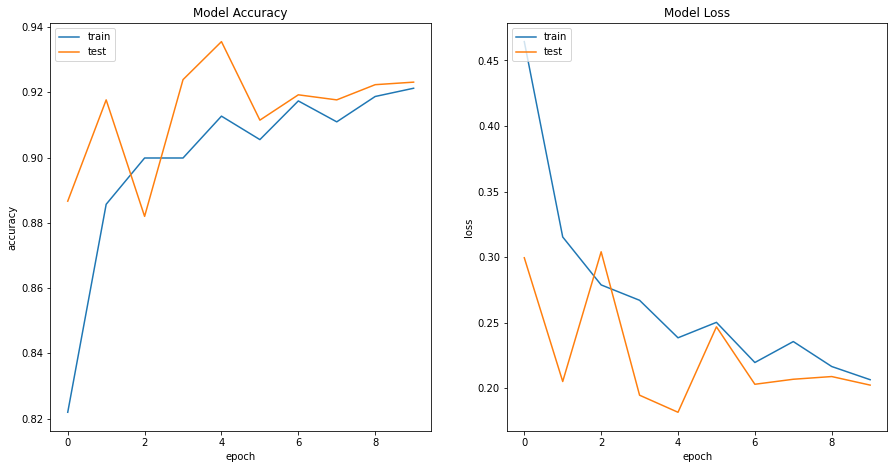

In [75]:
draw_plots(history_mome2)

In [76]:
print_metrics(model_mome2, x_test, y_test)

41/41 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.74      0.85       116
           1       0.82      0.95      0.88       317
           2       0.96      0.94      0.95       855

    accuracy                           0.92      1288
   macro avg       0.93      0.88      0.89      1288
weighted avg       0.93      0.92      0.92      1288



### momentum = 0.99

In [77]:
backend.clear_session()

inp3 = layers.Input(shape=(80,80,1))
out3 = layers.Flatten()(inp3)
out3 = layers.experimental.preprocessing.Rescaling(scale=1.0 / 255)(out3)
out3 = layers.Dense(1024, activation="relu")(out3)
out3 = layers.Dense(1024, activation="relu")(out3)
out3 = layers.Dense(3, activation="softmax")(out3)

In [78]:
backend.clear_session()
model_mome3 = models.Model(inputs=inp3, outputs=out3)

model_mome3.compile(
    optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.99),
    loss=losses.categorical_crossentropy,
    metrics=['accuracy']
  )

history_mome3 = model_mome3.fit(
    dataTrain,
    validation_data=dataTest,
    epochs=10
    )

Epoch 1/10
161/161 [==============================] - 141s 875ms/step - loss: 0.8595 - accuracy: 0.6785 - val_loss: 0.6448 - val_accuracy: 0.8432
Epoch 2/10
161/161 [==============================] - 140s 871ms/step - loss: 0.4114 - accuracy: 0.8594 - val_loss: 0.6410 - val_accuracy: 0.7337
Epoch 3/10
161/161 [==============================] - 140s 869ms/step - loss: 0.7906 - accuracy: 0.7079 - val_loss: 0.6246 - val_accuracy: 0.7337
Epoch 4/10
161/161 [==============================] - 140s 871ms/step - loss: 0.7482 - accuracy: 0.7062 - val_loss: 0.8171 - val_accuracy: 0.6716
Epoch 5/10
161/161 [==============================] - 140s 871ms/step - loss: 0.8819 - accuracy: 0.6510 - val_loss: 0.8682 - val_accuracy: 0.6638
Epoch 6/10
161/161 [==============================] - 140s 871ms/step - loss: 0.8733 - accuracy: 0.6599 - val_loss: 0.8392 - val_accuracy: 0.6638
Epoch 7/10
161/161 [==============================] - 140s 869ms/step - loss: 0.8468 - accuracy: 0.6589 - val_loss: 0.8347 -

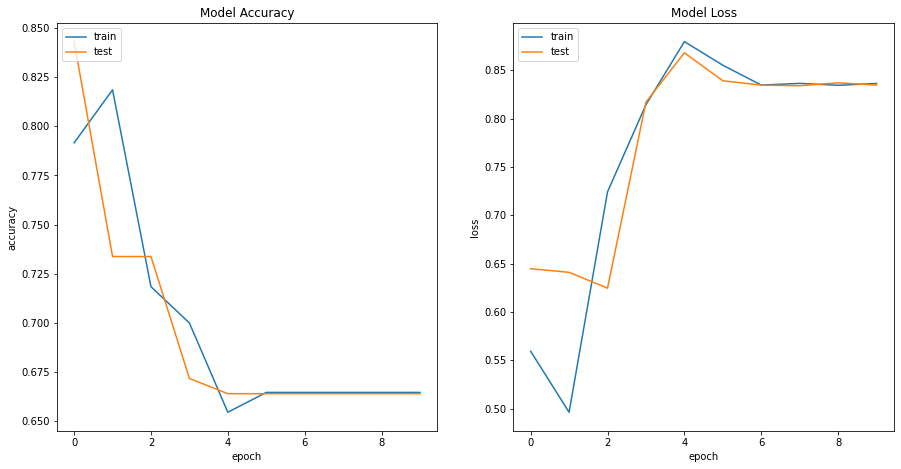

In [79]:
draw_plots(history_mome3)

In [80]:
print_metrics(model_mome3, x_test, y_test)

41/41 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       317
           2       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Conclusion
<div dir="rtl">
همان طور که از مقایسه نتایج این قسمت با حالتی که از این  الگوریتم استفاده نمی‌کردیم(قسمت ۵) به وضوح تسریع فرایند یادگیری مشخص است.
</div><div dir="rtl">
اما استفاده از mu با ضرایب زیاد، همان مشکل learning_rate های زیاد را به صورت خفیف تر می‌تواند به وجود بیاورد و موجب شود تا شبکه از حد مشخصی نتواند همگرا تر گردد. این مشکل به وضوح برای mu=0.99 مشخص است.
</div>

## Adam
Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.  
Adam can be looked at as a combination of RMSprop and Stochastic Gradient Descent with momentum. It uses the squared gradients to scale the learning rate like RMSprop and it takes advantage of momentum by using moving average of the gradient instead of gradient itself like SGD with momentum.

what is moment ?  
N-th moment of a random variable is defined as the expected value of that variable to the power of n.  

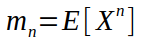

In [56]:
inp_a = layers.Input(shape=(80,80,1))
out_a = layers.Flatten()(inp_a)
out_a = layers.experimental.preprocessing.Rescaling(scale=1.0 / 255)(out_a)
out_a = layers.Dense(1024, activation="relu")(out_a)
out_a = layers.Dense(1024, activation="relu")(out_a)
out_a = layers.Dense(3, activation="softmax")(out_a)

In [57]:
backend.clear_session()
model_adam = models.Model(inputs=inp_a, outputs=out_a)

model_adam.compile(
    optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
    loss=losses.categorical_crossentropy,
    metrics=['accuracy']
  )

history_adam = model_adam.fit(
    dataTrain,
    validation_data=dataTest,
    epochs=10
    )

Epoch 1/10
161/161 [==============================] - 144s 892ms/step - loss: 2.5553 - accuracy: 0.6375 - val_loss: 0.3163 - val_accuracy: 0.8789
Epoch 2/10
161/161 [==============================] - 141s 878ms/step - loss: 0.3141 - accuracy: 0.8846 - val_loss: 0.2759 - val_accuracy: 0.8828
Epoch 3/10
161/161 [==============================] - 142s 882ms/step - loss: 0.2722 - accuracy: 0.8969 - val_loss: 0.2912 - val_accuracy: 0.8828
Epoch 4/10
161/161 [==============================] - 141s 881ms/step - loss: 0.2797 - accuracy: 0.8951 - val_loss: 0.2907 - val_accuracy: 0.8929
Epoch 5/10
161/161 [==============================] - 142s 880ms/step - loss: 0.2547 - accuracy: 0.9036 - val_loss: 0.2753 - val_accuracy: 0.8913
Epoch 6/10
161/161 [==============================] - 142s 882ms/step - loss: 0.2727 - accuracy: 0.8947 - val_loss: 0.1907 - val_accuracy: 0.9278
Epoch 7/10
161/161 [==============================] - 141s 879ms/step - loss: 0.2319 - accuracy: 0.9170 - val_loss: 0.2287 -

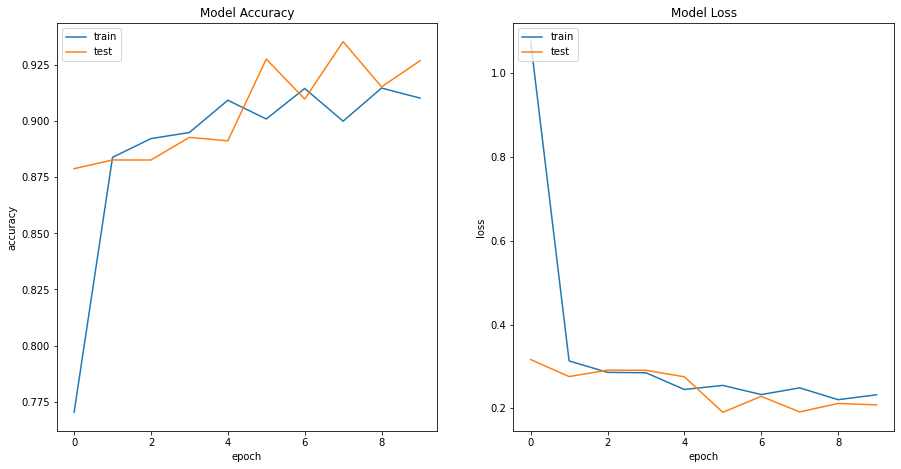

In [58]:
draw_plots(history_adam)

In [59]:
print_metrics(model_adam, x_test, y_test)

41/41 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       116
           1       0.84      0.92      0.88       317
           2       0.97      0.93      0.95       855

    accuracy                           0.93      1288
   macro avg       0.90      0.92      0.91      1288
weighted avg       0.93      0.93      0.93      1288



### Conclusion
<div dir="rtl">
در مقایسه خروجی این مدل با حالتی که از mu=0.9 استفاده کرده بودیم، تفاوت چشمگیری مشاهده نمی‌شود. البته به نظر می‌رسد مدل سریع تر به جواب بهینه نزدیک شده و میزان تفاوت بین نتیجه داده یادگیری و تست نیز کاهش یافته است. 
</div>
<div dir="rtl">
با وجود اقبالی که به الگوریتم addam در زمینه یادگیری ماشین وجود دارد، باید بدانیم این الگوریتم بی نقص نیست و میتواند مشکلاتی نیز داشته باشد. برای مثال در لینک زیر، یک بررسی عملی از عملکرد الگوریتم در دسته بندی ۲ گانه به نتایج بهتری در SGD رسیده است: 
</div>

"We construct an illustrative binary classification problem where the data is linearly separable, GD and SGD achieve zero test error, and AdaGrad, Adam, and RMSProp attain test errors arbitrarily close to half. We additionally study the empirical generalization capability of adaptive methods on several state-of-the-art deep learning models. We observe that the solutions found by adaptive methods generalize worse (often significantly worse) than SGD, even when these solutions have better training performance. These results suggest that practitioners should reconsider the use of adaptive methods to train neural networks."  
(https://arxiv.org/abs/1705.08292)

<div dir="rtl">
همچنین در این سایت نیز به این مسئله اشاره شده است:
</div>
"after a while people started noticing that despite superior training time, Adam in some areas does not converge to an optimal solution, so for some tasks (such as image classification on popular CIFAR datasets) state-of-the-art results are still only achieved by applying SGD with momentum."  
(https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c)

---
# Part 7: EPOCH size effect

## Why use EPOCH?
In terms of artificial neural networks, an epoch refers to one cycle through the full training dataset. Usually, training a neural network takes more than a few epochs. In other words, if we feed a neural network the training data for more than one epoch in different patterns, we hope for a better generalization when given a new "unseen" input (test data). An epoch is often mixed up with an iteration. Iterations is the number of batches or steps through partitioned packets of the training data, needed to complete one epoch.  Heuristically, one motivation is that (especially for large but finite training sets) it gives the network a chance to see the previous data to readjust the model parameters so that the model is not biased towards the last few data points during training.  
(ref:https://deepai.org/machine-learning-glossary-and-terms/epoch)

<div dir="rtl">
در یادگیری شبکه، گاهی لازم است تا شبکه دیتایی که قبلا دیده است را مجددا مشاهده کند و تغییرات جدید خود را به گونه‌ای تنظیم نماید که با داده هایی ابتدایی که مشاهده کرده هم مطابقت داشته باشد. همچنین آموزش مجدد شبکه با الگو و ترتیب متفاوتی از دیتا های تست میتواند به generilize شدن شبکه کمک کند.
</div><div dir="rtl">
لزوما در همه شبکه ها نیازی به چندین EPOCH نیست و مقدار بهینه برای آن از طریق روش هایی مشابه early stopping بدست می‌آید.
</div>


### using Adam as optimization func

In [47]:
inp_e = layers.Input(shape=(80,80,1))
out_e = layers.Flatten()(inp_e)
out_e = layers.experimental.preprocessing.Rescaling(scale=1.0 / 255)(out_e)
out_e = layers.Dense(1024, activation="relu")(out_e)
out_e = layers.Dense(1024, activation="relu")(out_e)
out_e = layers.Dense(3, activation="softmax")(out_e)

In [48]:
backend.clear_session()
model_adam = models.Model(inputs=inp_e, outputs=out_e)

model_adam.compile(
    optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
    loss=losses.categorical_crossentropy,
    metrics=['accuracy']
  )

history_adam20 = model_adam.fit(
    dataTrain,
    validation_data=dataTest,
    epochs=20
    )

Epoch 1/20
161/161 [==============================] - 144s 895ms/step - loss: 1.5748 - accuracy: 0.6994 - val_loss: 0.2151 - val_accuracy: 0.9161
Epoch 2/20
161/161 [==============================] - 143s 892ms/step - loss: 0.3209 - accuracy: 0.8869 - val_loss: 0.2006 - val_accuracy: 0.9278
Epoch 3/20
161/161 [==============================] - 143s 891ms/step - loss: 0.2782 - accuracy: 0.8987 - val_loss: 0.2061 - val_accuracy: 0.9255
Epoch 4/20
161/161 [==============================] - 142s 886ms/step - loss: 0.2821 - accuracy: 0.8966 - val_loss: 0.1977 - val_accuracy: 0.9278
Epoch 5/20
161/161 [==============================] - 142s 884ms/step - loss: 0.2670 - accuracy: 0.8987 - val_loss: 0.2174 - val_accuracy: 0.9293
Epoch 6/20
161/161 [==============================] - 142s 883ms/step - loss: 0.2449 - accuracy: 0.9071 - val_loss: 0.1771 - val_accuracy: 0.9332
Epoch 7/20
161/161 [==============================] - 142s 885ms/step - loss: 0.2398 - accuracy: 0.9162 - val_loss: 0.1730 -

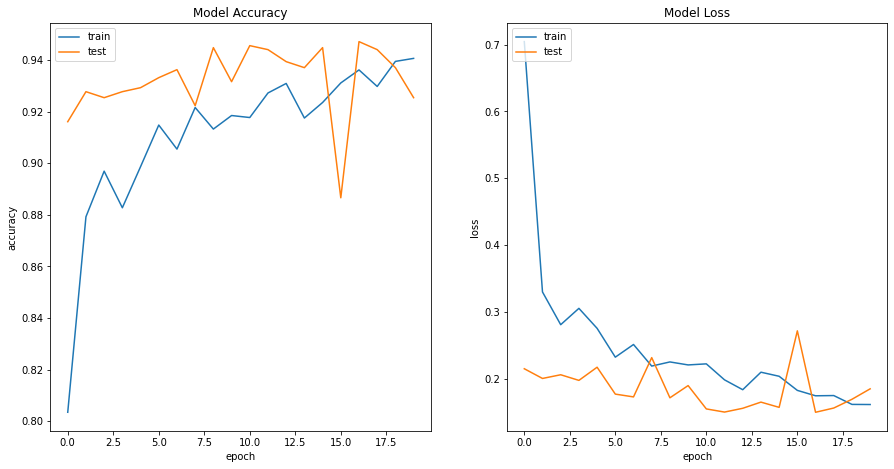

In [49]:
draw_plots(history_adam20)

In [50]:
print_metrics(model_adam, x_test, y_test)

41/41 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       116
           1       0.88      0.93      0.91       317
           2       0.97      0.92      0.95       855

    accuracy                           0.93      1288
   macro avg       0.87      0.93      0.90      1288
weighted avg       0.93      0.93      0.93      1288



### Using SGD as optimization func

In [51]:
inp_es = layers.Input(shape=(80,80,1))
out_es = layers.Flatten()(inp_es)
out_es = layers.experimental.preprocessing.Rescaling(scale=1.0 / 255)(out_es)
out_es = layers.Dense(1024, activation="relu")(out_es)
out_es = layers.Dense(1024, activation="relu")(out_es)
out_es = layers.Dense(3, activation="softmax")(out_es)

In [52]:
backend.clear_session()
model_mome2 = models.Model(inputs=inp_es, outputs=out_es)

model_mome2.compile(
    optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss=losses.categorical_crossentropy,
    metrics=['accuracy']
  )

history_mome2 = model_mome2.fit(
    dataTrain,
    validation_data=dataTest,
    epochs=20
    )

Epoch 1/20
161/161 [==============================] - 147s 912ms/step - loss: 0.8611 - accuracy: 0.6781 - val_loss: 0.3048 - val_accuracy: 0.8703
Epoch 2/20
161/161 [==============================] - 145s 904ms/step - loss: 0.3973 - accuracy: 0.8349 - val_loss: 0.3317 - val_accuracy: 0.8797
Epoch 3/20
161/161 [==============================] - 145s 905ms/step - loss: 0.3009 - accuracy: 0.8768 - val_loss: 0.2002 - val_accuracy: 0.9169
Epoch 4/20
161/161 [==============================] - 145s 905ms/step - loss: 0.2643 - accuracy: 0.9012 - val_loss: 0.1716 - val_accuracy: 0.9394
Epoch 5/20
161/161 [==============================] - 146s 905ms/step - loss: 0.2556 - accuracy: 0.9033 - val_loss: 0.3497 - val_accuracy: 0.8688
Epoch 6/20
161/161 [==============================] - 144s 893ms/step - loss: 0.2408 - accuracy: 0.9057 - val_loss: 0.2373 - val_accuracy: 0.9130
Epoch 7/20
161/161 [==============================] - 144s 896ms/step - loss: 0.2439 - accuracy: 0.9011 - val_loss: 0.1600 -

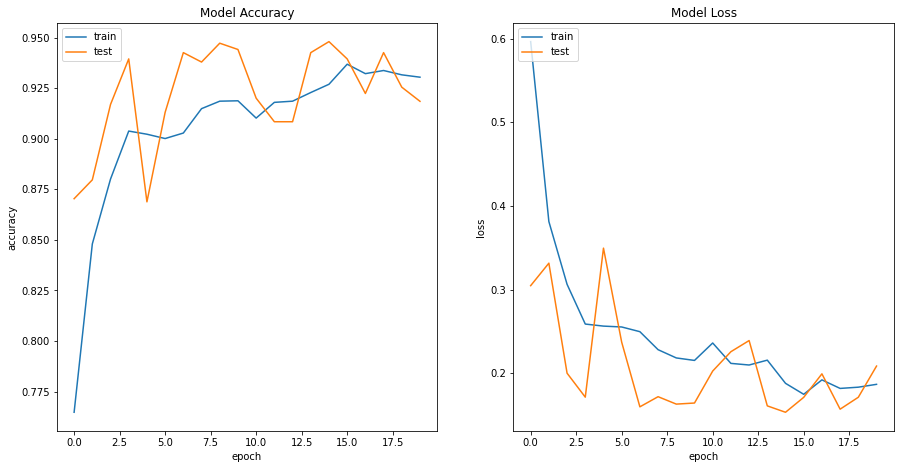

In [54]:
draw_plots(history_mome2)

In [55]:
print_metrics(model_mome2, x_test, y_test)

41/41 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.81      0.90       116
           1       0.80      0.95      0.87       317
           2       0.96      0.92      0.94       855

    accuracy                           0.92      1288
   macro avg       0.92      0.89      0.90      1288
weighted avg       0.93      0.92      0.92      1288



## Conclusion
<div dir="rtl">
لزوما تعداد epoch بیشتر به معنا دقت بیشتر شبکه نیست. وقتی تعداد epoch ها زیاد شود، شبکه بسیار به داده های آموزش نزدیک شده و عملکرد اش در مقابل داده های تست که تا کنون بازخوردی از آنها دریافت نکرده است کاهش می‌یابد.
</div>
<div dir="rtl">
برای مقابله با این مشکل، یکی از راه ها استفاده از early stopping است. در این روش به محض مشاهده کاهش دقت شبکه بر روی داده تست، از ادامه آموزش شبکه دست می‌کشیم تا پدیده overfitting رخ ندهد.
</div>

---
# Part 8: Loss Functions

In [12]:
inp_l = layers.Input(shape=(80,80,1))
out_l = layers.Flatten()(inp_l)
out_l = layers.experimental.preprocessing.Rescaling(scale=1.0 / 255)(out_l)
out_l = layers.Dense(1024, activation="relu")(out_l)
out_l = layers.Dense(1024, activation="relu")(out_l)
out_l = layers.Dense(3, activation="softmax")(out_l)

In [13]:
backend.clear_session()
model_mse = models.Model(inputs=inp_l, outputs=out_l)

model_mse.compile(
    optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
    loss=losses.mean_squared_error,
    metrics=['accuracy']
  )

history_mse = model_mse.fit(
    dataTrain,
    validation_data=dataTest,
    epochs=20
    )

Epoch 1/20
161/161 [==============================] - 149s 918ms/step - loss: 0.2150 - accuracy: 0.6757 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 2/20
161/161 [==============================] - 147s 913ms/step - loss: 0.2113 - accuracy: 0.6830 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 3/20
161/161 [==============================] - 148s 918ms/step - loss: 0.2160 - accuracy: 0.6760 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 4/20
161/161 [==============================] - 148s 921ms/step - loss: 0.2283 - accuracy: 0.6575 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 5/20
161/161 [==============================] - 149s 927ms/step - loss: 0.2216 - accuracy: 0.6676 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 6/20
161/161 [==============================] - 155s 963ms/step - loss: 0.2278 - accuracy: 0.6583 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 7/20
161/161 [==============================] - 154s 956ms/step - loss: 0.2208 - accuracy: 0.6687 - val_loss: 0.2241 -

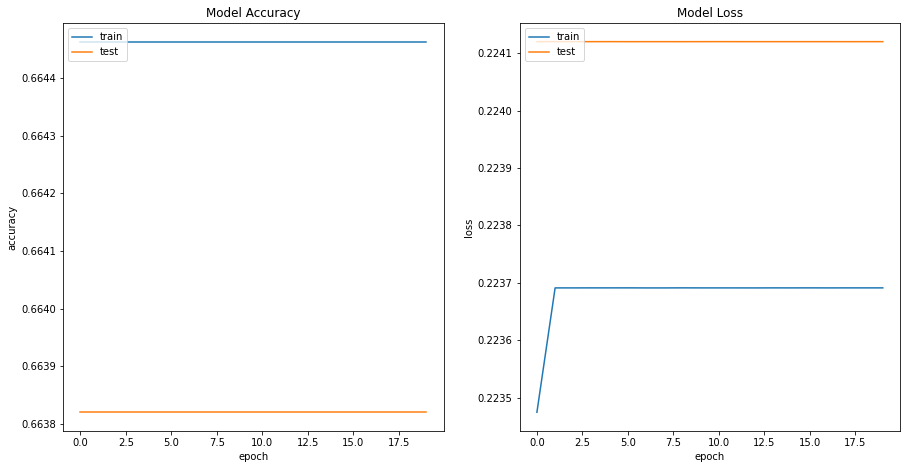

In [14]:
draw_plots(history_mse)

In [15]:
print_metrics(model_mse, x_test, y_test)

41/41 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       317
           2       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conclusin
<div dir="rtl">
به وضوع شبکه توانایی همگرا شدن را ندارد و مستقل از تعداد epoch ها به دقت خوبی نخواهد رسید در حالی که همین معماری شبکه به نتایج بسیار خوبی با تابع crossEntropy رسیده بود.
</div>
<div dir="rtl">
۲ دلیل اصلی برای مناسب نبودن تابع MSE وجود دارد:
</div>
<div dir="rtl">
۱. با استفاده از mse ما فرض کرده ایم که داده ما از یک  توزیع نرمال برخوردار است در حالی که بیشتر توزیعی مشابه توزیع برنولی دارد. 
</div>
https://towardsdatascience.com/where-did-the-binary-cross-entropy-loss-function-come-from-ac3de349a715
</br></br>
<div dir="rtl">
۲. تابع خطا MSE برای طبقه بندی ۲ تایی همگرا نیست. به این معنی که شبکه به سمت کاهش تابع خطا پیش نمی‌رود چرا که تابع MSE انتظار مقادیر از منفی بی‌نهایت تا مثبت بی‌نهایت را دارد در حالی که خروجی شبکه ما تنها مقادیر بازه ۰ تا ۱ است.
</div>
"When the MSE function is passed a value that is unbounded a nice U-shaped (convex) curve is the result where there is a clear minimum point at the target value (y). On the other hand, when a bounded value from a Sigmoid function is passed to the MSE function the result is not convex; on one side the function is concave while on the other side the function convex and no clear minimum point. So, if by accident a binary classification neural network is initialized with weights which are large in magnitude such that it lands on the concave part of the MSE Cost function gradient descent will not work and consequently, weights may not update or improve very slowly"
https://towardsdatascience.com/why-using-mean-squared-error-mse-cost-function-for-binary-classification-is-a-bad-idea-933089e90df7

</br></br>
<div dir="rtl">
بنابر این زمانی از این تابع استفاده می کنیم که داده ما از توزیع نرمال برخوردار باشد و خروجی ما یک تابع طبقه بندی محدود نباشد.
</div>

---
# Part 9: Regularization
<div dir="rtl">
پیشتر درباره مشکلات مربوط به overfitting صحبت کردیم. به مجموعه راهکار هایی که برای جلوگیری از overfitting در کنار جلوگیری از underfitting انجام میشود، Regularization می‌گویند.
یک مدل میتواند overfit شود زیارا توانایی این کار را داراست. به همین جهت برای حل مشکل کافیست توانایی مدل را کاهش دهیم. این کار از طریق ساده سازی معماری مدل و محدود کردن بازه پارامتر ها می‌تواند صورت پذیرد. برای مثال ترغیب مدل به استفاده از وزن های کوچک نوعی از محدودیت گذاری تلقی می‌شود.
</div>
<div dir="rtl">
در ادامه ۲ روش متفاوت برای این منظور را بررسی می‌کنیم:
</div>

## L2 Regularizer

In [19]:
inp4 = layers.Input(shape=(80,80,1))
out4 = layers.Flatten()(inp4)
out4 = layers.experimental.preprocessing.Rescaling(scale=1.0 / 255)(out4)
out4 = layers.Dense(1024, activation="relu", kernel_regularizer=regularizers.l2(0.0001))(out4)
out4 = layers.Dense(1024, activation="relu", kernel_regularizer=regularizers.l2(0.0001))(out4)
out4 = layers.Dense(3, activation="softmax", kernel_regularizer=regularizers.l2(0.0001))(out4)

In [20]:
backend.clear_session()
model_regl2 = models.Model(inputs=inp4, outputs=out4)

model_regl2.compile(
    optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
    loss=losses.categorical_crossentropy,
    metrics=['accuracy']
  )

history_regl2 = model_regl2.fit(
    dataTrain,
    validation_data=dataTest,
    epochs=20
    )

Epoch 1/20
161/161 [==============================] - 157s 972ms/step - loss: 1.7434 - accuracy: 0.7025 - val_loss: 0.4443 - val_accuracy: 0.9037
Epoch 2/20
161/161 [==============================] - 158s 982ms/step - loss: 0.5144 - accuracy: 0.8544 - val_loss: 0.3677 - val_accuracy: 0.9099
Epoch 3/20
161/161 [==============================] - 159s 986ms/step - loss: 0.4106 - accuracy: 0.8997 - val_loss: 0.3481 - val_accuracy: 0.9084
Epoch 4/20
161/161 [==============================] - 158s 987ms/step - loss: 0.3650 - accuracy: 0.9026 - val_loss: 0.3044 - val_accuracy: 0.9185
Epoch 5/20
161/161 [==============================] - 160s 995ms/step - loss: 0.3594 - accuracy: 0.8997 - val_loss: 0.3632 - val_accuracy: 0.8929
Epoch 6/20
161/161 [==============================] - 161s 999ms/step - loss: 0.3582 - accuracy: 0.8948 - val_loss: 0.3149 - val_accuracy: 0.9278
Epoch 7/20
161/161 [==============================] - 148s 918ms/step - loss: 0.3082 - accuracy: 0.9109 - val_loss: 0.2497 -

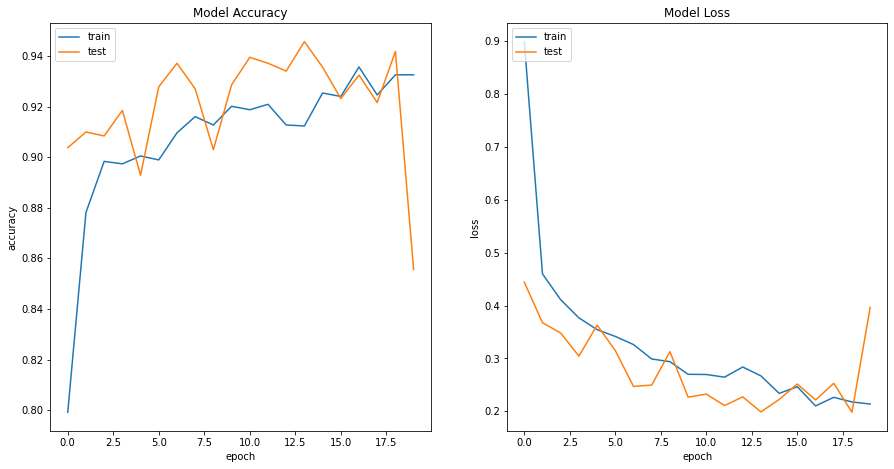

In [21]:
draw_plots(history_regl2)

In [22]:
print_metrics(model_regl2, x_test, y_test)

41/41 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.53      0.70       116
           1       0.66      0.97      0.79       317
           2       0.96      0.86      0.91       855

    accuracy                           0.86      1288
   macro avg       0.87      0.79      0.80      1288
weighted avg       0.89      0.86      0.86      1288



<div dir="rtl">
به جز در مرحله نهایی، شاهد افزایش دقت بر روی داده تست در کنار افزایش دقت بر روی داده آموزش هستیم. به این معنا که با افزایش تعداد epoch ها پدیده overfitting رخ نداده و مدل همچنان عملکردش نسبت به داده تست در حال بهبود است.
</div>

## DropOut Regularizer

In [23]:
inp5 = layers.Input(shape=(80,80,1))
out5 = layers.Flatten()(inp5)
out5 = layers.experimental.preprocessing.Rescaling(scale=1.0 / 255)(out5)
out5 = layers.Dense(1024, activation="relu")(out5)
out5 = layers.Dropout(0.1)(out5)
out5 = layers.Dense(1024, activation="relu")(out5)
out5 = layers.Dropout(0.1)(out5)
out5 = layers.Dense(3, activation="softmax")(out5)

In [24]:
backend.clear_session()
model_dropout = models.Model(inputs=inp5, outputs=out5)

model_dropout.compile(
    optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
    loss=losses.categorical_crossentropy,
    metrics=['accuracy']
  )

history_dropout = model_dropout.fit(
    dataTrain,
    validation_data=dataTest,
    epochs=20
    )

Epoch 1/20
161/161 [==============================] - 166s 1s/step - loss: 2.1185 - accuracy: 0.6621 - val_loss: 0.3279 - val_accuracy: 0.8540
Epoch 2/20
161/161 [==============================] - 164s 1s/step - loss: 0.3479 - accuracy: 0.8608 - val_loss: 0.2681 - val_accuracy: 0.8905
Epoch 3/20
161/161 [==============================] - 161s 1000ms/step - loss: 0.3268 - accuracy: 0.8770 - val_loss: 0.2602 - val_accuracy: 0.8913
Epoch 4/20
161/161 [==============================] - 163s 1s/step - loss: 0.2891 - accuracy: 0.8922 - val_loss: 0.1930 - val_accuracy: 0.9340
Epoch 5/20
161/161 [==============================] - 161s 999ms/step - loss: 0.2893 - accuracy: 0.8930 - val_loss: 0.2030 - val_accuracy: 0.9154
Epoch 6/20
161/161 [==============================] - 167s 1s/step - loss: 0.2686 - accuracy: 0.8980 - val_loss: 0.1831 - val_accuracy: 0.9309
Epoch 7/20
161/161 [==============================] - 165s 1s/step - loss: 0.2567 - accuracy: 0.9017 - val_loss: 0.2800 - val_accuracy:

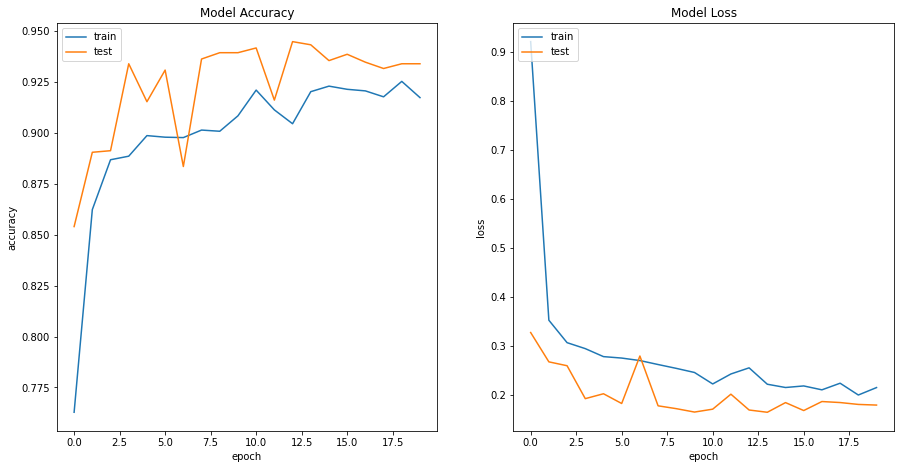

In [25]:
draw_plots(history_dropout)

In [26]:
print_metrics(model_dropout, x_test, y_test)

41/41 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.83      0.86       116
           1       0.86      0.93      0.89       317
           2       0.97      0.95      0.96       855

    accuracy                           0.93      1288
   macro avg       0.91      0.90      0.91      1288
weighted avg       0.94      0.93      0.93      1288



<div dir="rtl">
در روش dropout در هر مرحله تعدادی از درایه های شبکه را به ۰ تغییر میدهیم تا شبکه به سمت تطابق کامل با داده آموزش پیش نرود. با انتخاب رندوم درایه هایی که میخواهیم به ۰ تبدیل کنیم، شانس خوبی برای generalize کردن شبکه می توانیم بدست بیاوریم.
</div>

---
---
# Ref.
Momentum: 

- https://medium.com/@abhinav.mahapatra10/ml-advanced-momentum-in-machine-learning-what-is-nesterov-momentum-ad37ce1935fc

Adam:
- https://keras.io/api/optimizers/adam/
- https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
- https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c
- https://arxiv.org/abs/1705.08292

EPOCH:
- https://deepai.org/machine-learning-glossary-and-terms/epoch

MSE:
- https://towardsdatascience.com/why-using-mean-squared-error-mse-cost-function-for-binary-classification-is-a-bad-idea-933089e90df7
- https://towardsdatascience.com/where-did-the-binary-cross-entropy-loss-function-come-from-ac3de349a715

Regularization:
- https://machinelearningmastery.com/introduction-to-regularization-to-reduce-overfitting-and-improve-generalization-error/
- https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
- https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
- https://keras.io/api/layers/regularizers/



